### CutMix 

- Patches are cut and pasted among training images

- Class labels are also mixed proportionally to the area of the patches.

In [1]:
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt 

In [3]:
image_path = "./data"
index_len = len(os.listdir(image_path))
print("index_len >>> ", index_len)

image_list = os.listdir(image_path)
print("image_list >>> ", image_list)

index_len >>>  4
image_list >>>  ['orange1.png', 'orange2.png', 'orange3.png', 'orange4.png']


In [5]:
# load image
def load_image(path, index) :
    image = cv2.imread(os.path.join(path, image_list[index]), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0 # normalization을 위해 해당 값으로 나눔
    print(image)
    return image

In [6]:
image = load_image(image_path, 3)
image_size = image.shape[0]

[[[0.8352941  0.48235294 0.00392157]
  [0.8392157  0.4862745  0.00784314]
  [0.84313726 0.49019608 0.00784314]
  ...
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]]

 [[0.8392157  0.4862745  0.00784314]
  [0.8392157  0.4862745  0.00392157]
  [0.8392157  0.4862745  0.00392157]
  ...
  [0.84313726 0.30980393 0.00392157]
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]]

 [[0.84705883 0.49411765 0.01176471]
  [0.84313726 0.49019608 0.00784314]
  [0.8392157  0.4862745  0.00392157]
  ...
  [0.84313726 0.30980393 0.00392157]
  [0.84313726 0.30980393 0.00392157]
  [0.84313726 0.30980393 0.00392157]]

 ...

 [[0.74509805 0.4862745  0.01568628]
  [0.7490196  0.49019608 0.00784314]
  [0.75686276 0.5058824  0.        ]
  ...
  [0.78431374 0.49019608 0.        ]
  [0.79607844 0.49019608 0.00392157]
  [0.8        0.49411765 0.        ]]

 [[0.7411765  0.4862745  0.01568628]
  [0.7372549  0.4862745  0.        ]


In [7]:
def cutmix(path, index, imgsize) :
    w, h = imgsize, imgsize
    s = imgsize // 2

    # 중앙값 랜덤하게 잡기(256 ~ 768)
    xc, yc = [int(random.uniform(imgsize * 0.25, imgsize * 0.75)) for _ in range(2)]
    

    indexes = [index] + [random.randint(0, index) for _ in range(3)]

    # 검은색 배경인 임의의 이미지 생성(여기다가 이미지 붙여넣기)
    return_img = np.full((imgsize, imgsize, 3), 1, dtype=np.float32)

    for i, index in enumerate(indexes) :
        image = load_image(path, index)

        # top left
        if i == 0 :
            # large image
            x1a, y1a, x2a, y2a = max(xc-w, 0), max(yc-h,0), xc, yc
            # small image
            x1b, y1b, x2b, y2b = w - (x2a-x1a), h - (y2a-y1a), w, h
        elif i == 1 :
            # top right
            x1a, y1a, x2a, y2a = xc, max(yc-h, 0), min(xc+w, s*2), yc
            x1b, y1b, x2b, y2b = 0, h - (y2a-y1a), min(w, x2a-x1a), h
        elif i == 2 :
            # bottom left
            x1a, y1a, x2a, y2a = max(xc-w, 0), yc, xc, min(s*2, yc+h)
            x1b, y1b, x2b, y2b = w - (x2a-x1a), 0, max(xc, w), min(y2a-y1a, h)
        elif i == 3 :
            x1a, y1a, x2a, y2a = xc, yc, min(xc+w, s*2), min(s*2, yc+h)
            x1b, y1b, x2b, y2b = 0, 0, min(w, x2a-x1a), min(y2a-y1a, h)

        return_img[y1a:y2a, x1a:x2a] = image[y1b:y2b, x1b:x2b]

    return return_img

[[[0.8352941  0.48235294 0.00392157]
  [0.8392157  0.4862745  0.00784314]
  [0.84313726 0.49019608 0.00784314]
  ...
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]]

 [[0.8392157  0.4862745  0.00784314]
  [0.8392157  0.4862745  0.00392157]
  [0.8392157  0.4862745  0.00392157]
  ...
  [0.84313726 0.30980393 0.00392157]
  [0.84705883 0.3137255  0.00784314]
  [0.84705883 0.3137255  0.00784314]]

 [[0.84705883 0.49411765 0.01176471]
  [0.84313726 0.49019608 0.00784314]
  [0.8392157  0.4862745  0.00392157]
  ...
  [0.84313726 0.30980393 0.00392157]
  [0.84313726 0.30980393 0.00392157]
  [0.84313726 0.30980393 0.00392157]]

 ...

 [[0.74509805 0.4862745  0.01568628]
  [0.7490196  0.49019608 0.00784314]
  [0.75686276 0.5058824  0.        ]
  ...
  [0.78431374 0.49019608 0.        ]
  [0.79607844 0.49019608 0.00392157]
  [0.8        0.49411765 0.        ]]

 [[0.7411765  0.4862745  0.01568628]
  [0.7372549  0.4862745  0.        ]


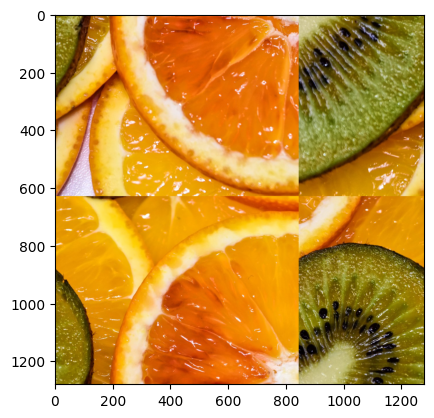

In [8]:
test = cutmix(image_path, 3, image_size)
plt.imshow(test)
plt.show()